In [63]:
import sys
import pandas as pd

sys.path.append('..')

In [64]:
import rbf_functions

In [65]:

rbfs = [rbf_functions.squared_exponential_rbf,
        rbf_functions.gaussian_rbf,
        rbf_functions.inverse_quadric_rbf
       ]

pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = f"../output/{name}/"
    
    results = pd.read_csv(output_dir + '10_solution.csv')
    results['environment'] = 1 - results['environment']
    
    pareto_sets[name] = results


In [66]:
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits

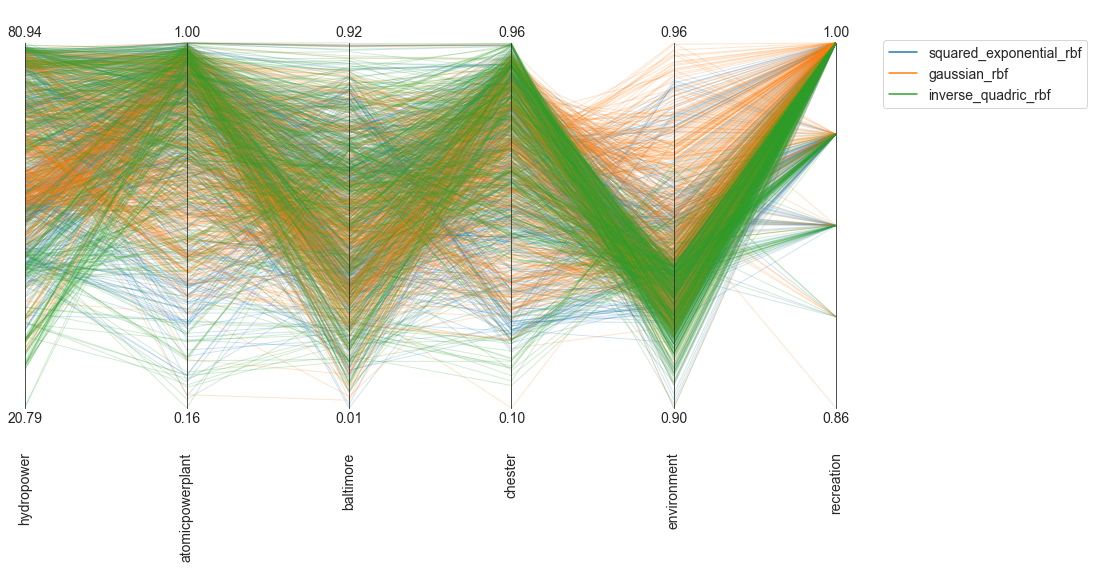

In [59]:
limits = get_limits(pd.concat(pareto_sets.values()))

axes = ParallelAxes(limits)

sns.color_palette()

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes.plot(v, label=k, lw=1, color=c, alpha=0.2)

axes.legend()

plt.show()

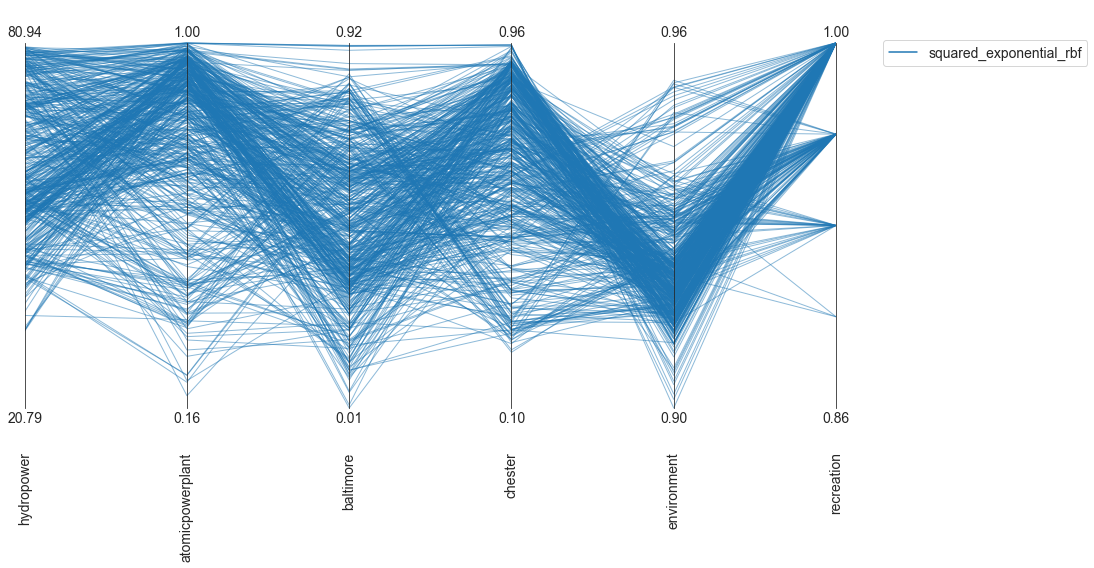

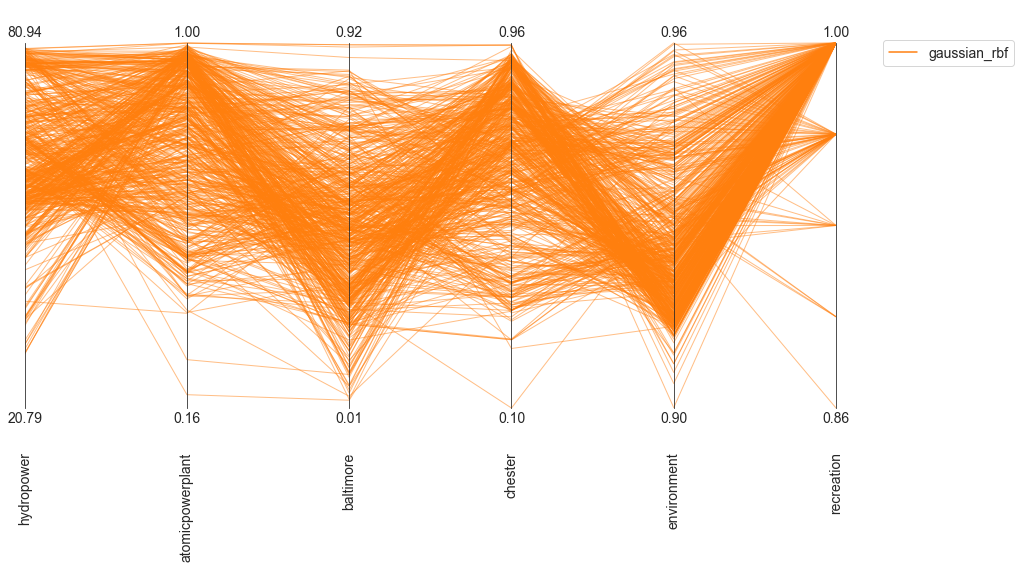

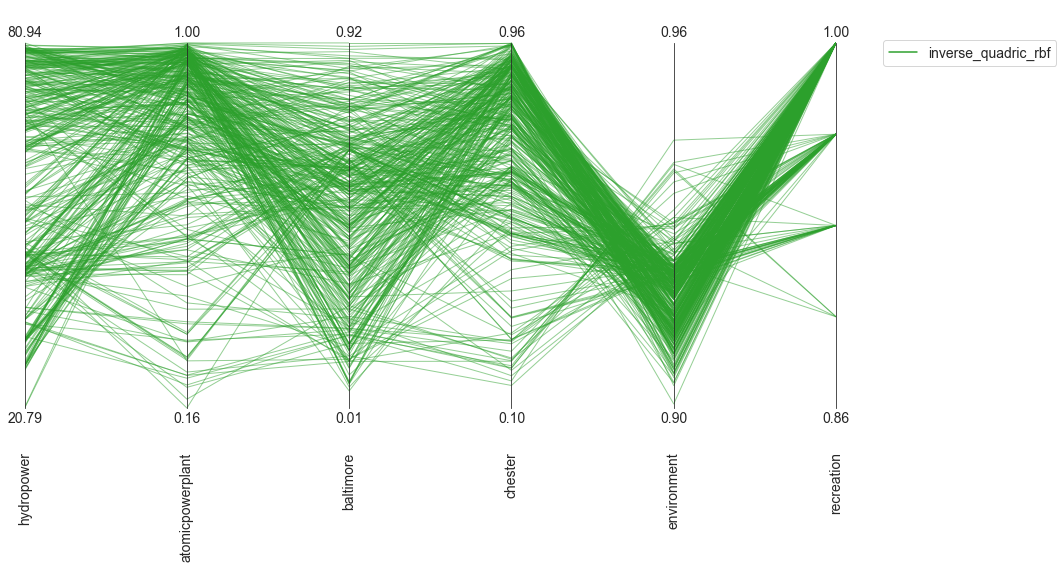

In [60]:
limits = get_limits(pd.concat(pareto_sets.values()))

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes = ParallelAxes(limits)    
    axes.plot(v, label=k, lw=1, color=c, alpha=0.5)
    axes.legend()

plt.show()

In [61]:
for k, v in pareto_sets.items():
    v['rbf'] = k

combined = pd.concat(pareto_sets.values())    
combined.head()

,hydropower,atomicpowerplant,baltimore,chester,environment,recreation,rbf
0,73.154201,0.778500,0.640140,0.743475,0.913032,1.0,squared_exponential_rbf
1,68.964924,0.683074,0.833056,0.702342,0.911085,1.0,squared_exponential_rbf
2,61.437643,0.951015,0.312643,0.314327,0.921434,1.0,squared_exponential_rbf
3,63.605227,0.866501,0.450539,0.646095,0.922830,1.0,squared_exponential_rbf
4,75.002407,0.913329,0.679578,0.797816,0.912618,1.0,squared_exponential_rbf


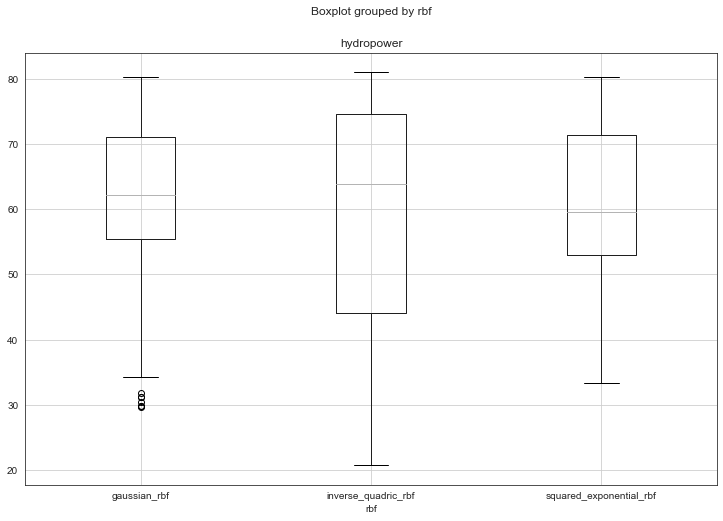

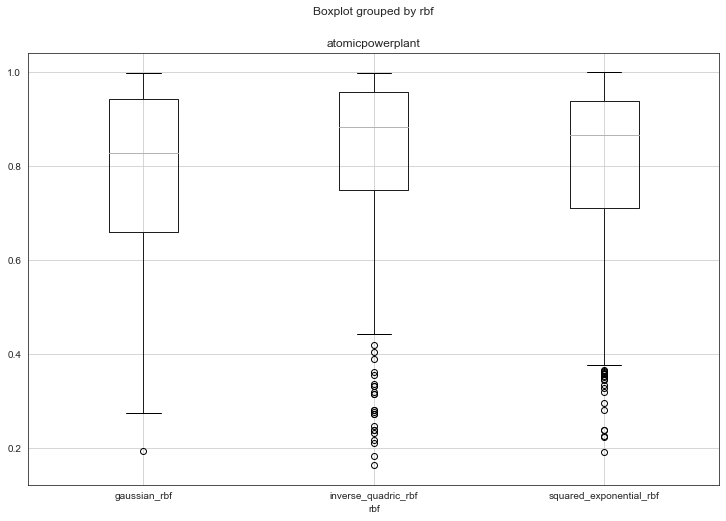

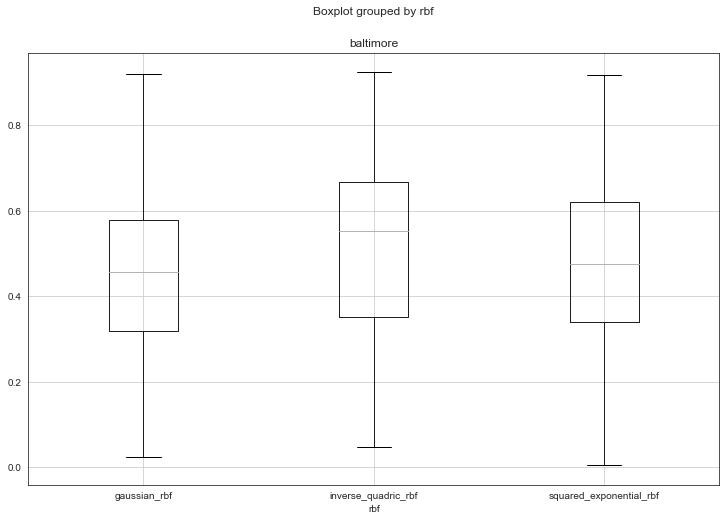

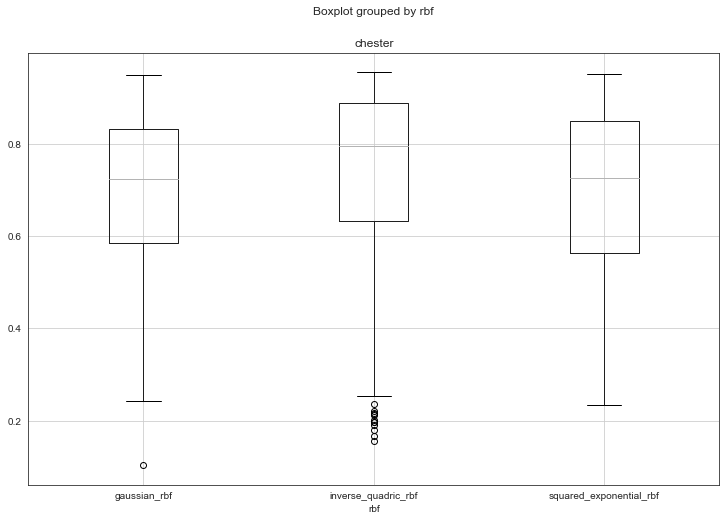

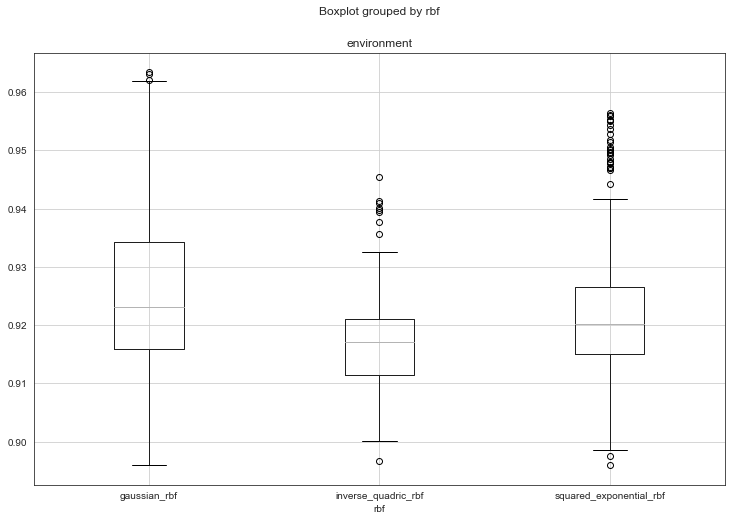

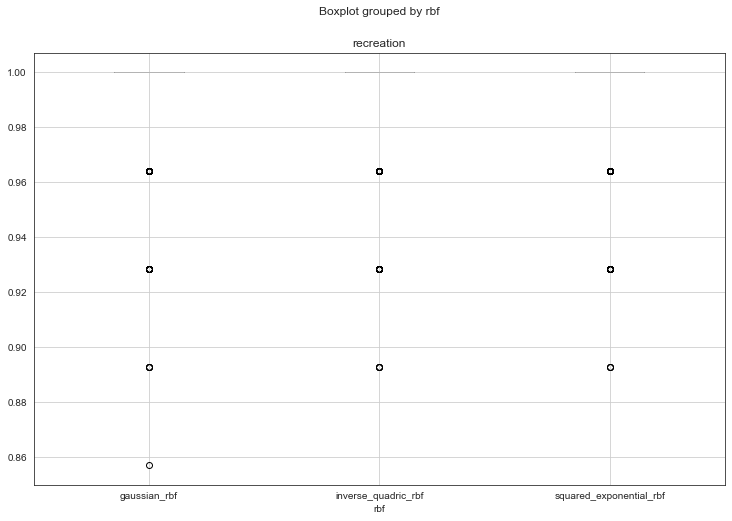

In [62]:
for entry in combined.columns[0:-1]:
    combined.boxplot(column=entry, by='rbf')

plt.show()